In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install scikit-learn==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
dia = pd.read_csv('/content/diabetes_risk_prediction_dataset.csv')
dia.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [35]:
dia.describe()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

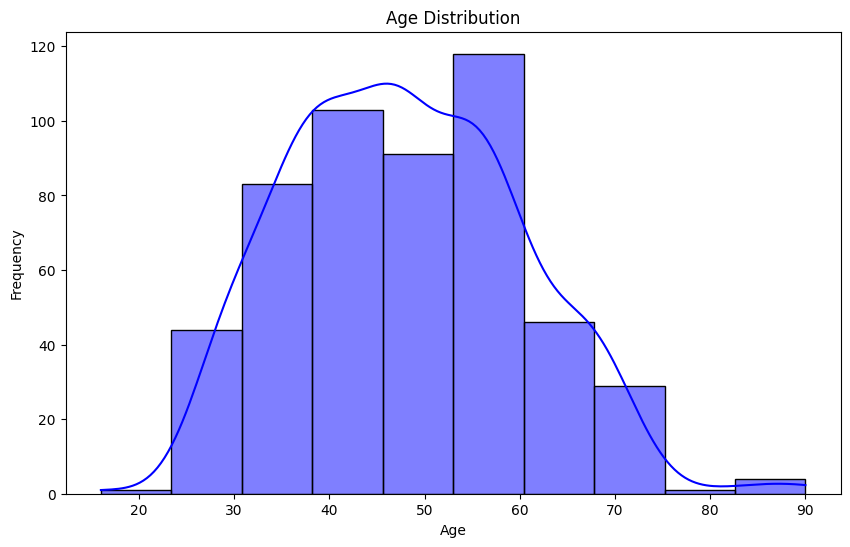

In [34]:
dia.columns = map(str.lower, dia.columns)

plt.figure(figsize=(10, 6))
sns.histplot(dia["age"], bins=10, color="blue", kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()

In [11]:
dia.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [12]:
columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
           'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
           'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness',
           'Alopecia', 'Obesity', 'class']
dia[columns] = dia[columns].apply(LabelEncoder().fit_transform)

dia.head(100)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1
96,30,0,1,1,1,1,0,0,0,1,0,1,1,1,0,0,1
97,31,0,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1
98,35,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [36]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [37]:
dia.describe()

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
X = dia.drop(['class'], axis=1).values  # Features
y = dia['class']  # Target variable

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [38]:
X

array([[-0.6613669 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762, -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 80)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

In [24]:
acc

0.8942307692307693

In [25]:
y_test.values

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [26]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.90      0.92      0.91        62

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



In [29]:
import seaborn as sns

<Axes: xlabel='Predicted', ylabel='Actual'>

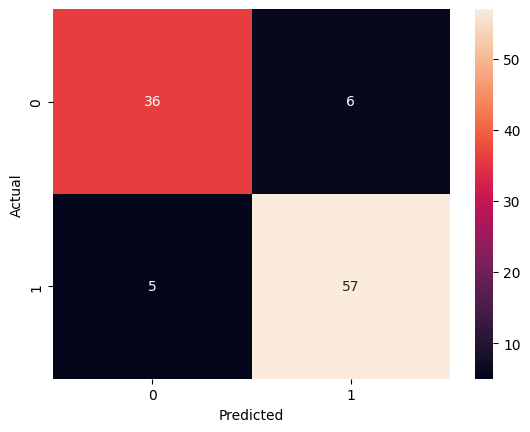

In [30]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [31]:
!pip install pypickle

In [32]:
import pypickle
filepath = 'model.pkl'
pypickle.save(filepath, model)

[pypickle] Pickle file saved: [model.pkl]


True